In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
llm_external = pd.read_csv('4epochs_mistral_external_test_predictions.csv')
llm_internal = pd.read_csv('4epochs_mistral_internaltest_predictions.csv')
zer_in = pd.read_csv('mstral_zero_predictions.csv')
zer_ex = pd.read_csv('test_external_zero_predictions.csv')


twenty = pd.read_csv('20.csv')
hundred = pd.read_csv('100.csv')
two_hundred = pd.read_csv('200.csv')
four = pd.read_csv('400.csv')
hezar = pd.read_csv('1000.csv')
llm_external.replace('die',0 , inplace=True)
llm_external.replace('survive',1 , inplace=True)

llm_internal.replace('die',0 , inplace=True)
llm_internal.replace('survive',1 , inplace=True)

zer_in.replace('die',0 , inplace=True)
zer_in.replace('survive',1 , inplace=True)

zer_ex.replace('die',0 , inplace=True)
zer_ex.replace('survive',1 , inplace=True)

twenty.replace({'survive':1 , 'die':0}, inplace=True)
hundred.replace({'survive':1 , 'die':0}, inplace=True)
two_hundred.replace({'survive':1 , 'die':0}, inplace=True)
four.replace({'survive':1 , 'die':0}, inplace=True)
hezar.replace({'survive':1 , 'die':0}, inplace=True)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# metrics caculator function 

def calculate_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    cm = confusion_matrix(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    f1 = f1_score(y_test, y_predicted)
    
    return accuracy, precision, recall, specificity, f1


def calculate_and_update_model_metrics(y_test, y_predicted,y_ex, y_ex_predicted):
    accuracy, precision, recall, specificity, f1 = calculate_metrics(y_test, y_predicted)
    model = {}
    model["accuracy"] = accuracy
    model["precision"] = precision
    model["recall"] = recall
    model["specificity"] = specificity
    model["f1"] = f1
    model["AUC"] = roc_auc_score(y_test, y_predicted)
    
    accuracy_ex, precision_ex, recall_ex, specificity_ex, f1_ex = calculate_metrics(y_ex, y_ex_predicted)
    model["accuracy_ex"] = accuracy_ex
    model["precision_ex"] = precision_ex
    model["recall_ex"] = recall_ex
    model["specificity_ex"] = specificity_ex
    model["f1_ex"] = f1_ex
    model["AUC_ex"] = roc_auc_score(y_ex, y_ex_predicted)
    return model


In [25]:
data = calculate_and_update_model_metrics(llm_internal['y_true'].tolist(), llm_internal['y_pred'].tolist(),llm_external['y_true'].tolist(), llm_external['y_pred'].tolist())
df = pd.DataFrame(data , index=[0])

In [26]:
data = calculate_and_update_model_metrics(zer_in['y_true'].tolist(), zer_in['y_pred'].tolist(),zer_ex['y_true'].tolist(), zer_ex['y_pred'].tolist())
df2 = pd.DataFrame(data , index=[0])

In [27]:
c = pd.concat([df , df2] ,axis= 0 )
c

,accuracy,precision,recall,specificity,f1,AUC,accuracy_ex,precision_ex,recall_ex,specificity_ex,f1_ex,AUC_ex
0,0.720339,0.693452,0.789831,0.650847,0.738510,0.720339,0.670175,0.632877,0.810526,0.529825,0.710769,0.670175
0,0.669492,0.719298,0.555932,0.783051,0.627151,0.669492,0.687719,0.689046,0.684211,0.691228,0.686620,0.687719


In [28]:
c.to_excel('fine_tuned-and-zero_shot.xlsx', index=False)

In [51]:
def calculate_and_update_model_metrics(y_test, y_predicted):
    accuracy, precision, recall, specificity, f1 = calculate_metrics(y_test, y_predicted)
    model = {}
    #model["accuracy"] = accuracy
    #model["precision"] = precision
    #model["recall"] = recall
    #model["specificity"] = specificity
    model["f1"] = f1
   # model["AUC"] = roc_auc_score(y_test, y_predicted)
    
    return model

In [69]:
data0 = calculate_and_update_model_metrics(zer_in['y_true'].tolist(), zer_in['y_pred'].tolist())
data = calculate_and_update_model_metrics(twenty['y_true'].tolist(), twenty['y_pred'].tolist())
data1 = calculate_and_update_model_metrics(hundred['y_true'].tolist(), hundred['y_pred'].tolist())
data2 = calculate_and_update_model_metrics(two_hundred['y_true'].tolist(), two_hundred['y_pred'].tolist())
data3 = calculate_and_update_model_metrics(four['y_true'].tolist(), four['y_pred'].tolist())
data4 = calculate_and_update_model_metrics(hezar['y_true'].tolist(), hezar['y_pred'].tolist())
data5 = calculate_and_update_model_metrics(llm_internal['y_true'].tolist(), llm_internal['y_pred'].tolist())

df0 = pd.DataFrame(data0 , index=[0])
df = pd.DataFrame(data , index=[0])
df1 = pd.DataFrame(data1 , index=[0])
df2 = pd.DataFrame(data2 , index=[0])
df3 = pd.DataFrame(data3 , index=[0])
df4 = pd.DataFrame(data4 , index=[0])
df5 = pd.DataFrame(data5 , index=[0])

In [53]:
f = pd.concat([df0 , df , df1, df2,df3 , df4 , df5] ,axis= 0 )
f.index = ["0","20","100", "200", "400", "1000", "2477"]
f

,f1
0,0.627151
20,0.626747
100,0.351351
200,0.675367
400,0.631985
1000,0.667774
2477,0.738510


[Text(0.5, 0, 'Threshold'),
 Text(0, 0.5, 'Scores'),
 Text(0.5, 1.0, 'Model Evaluation Metrics')]

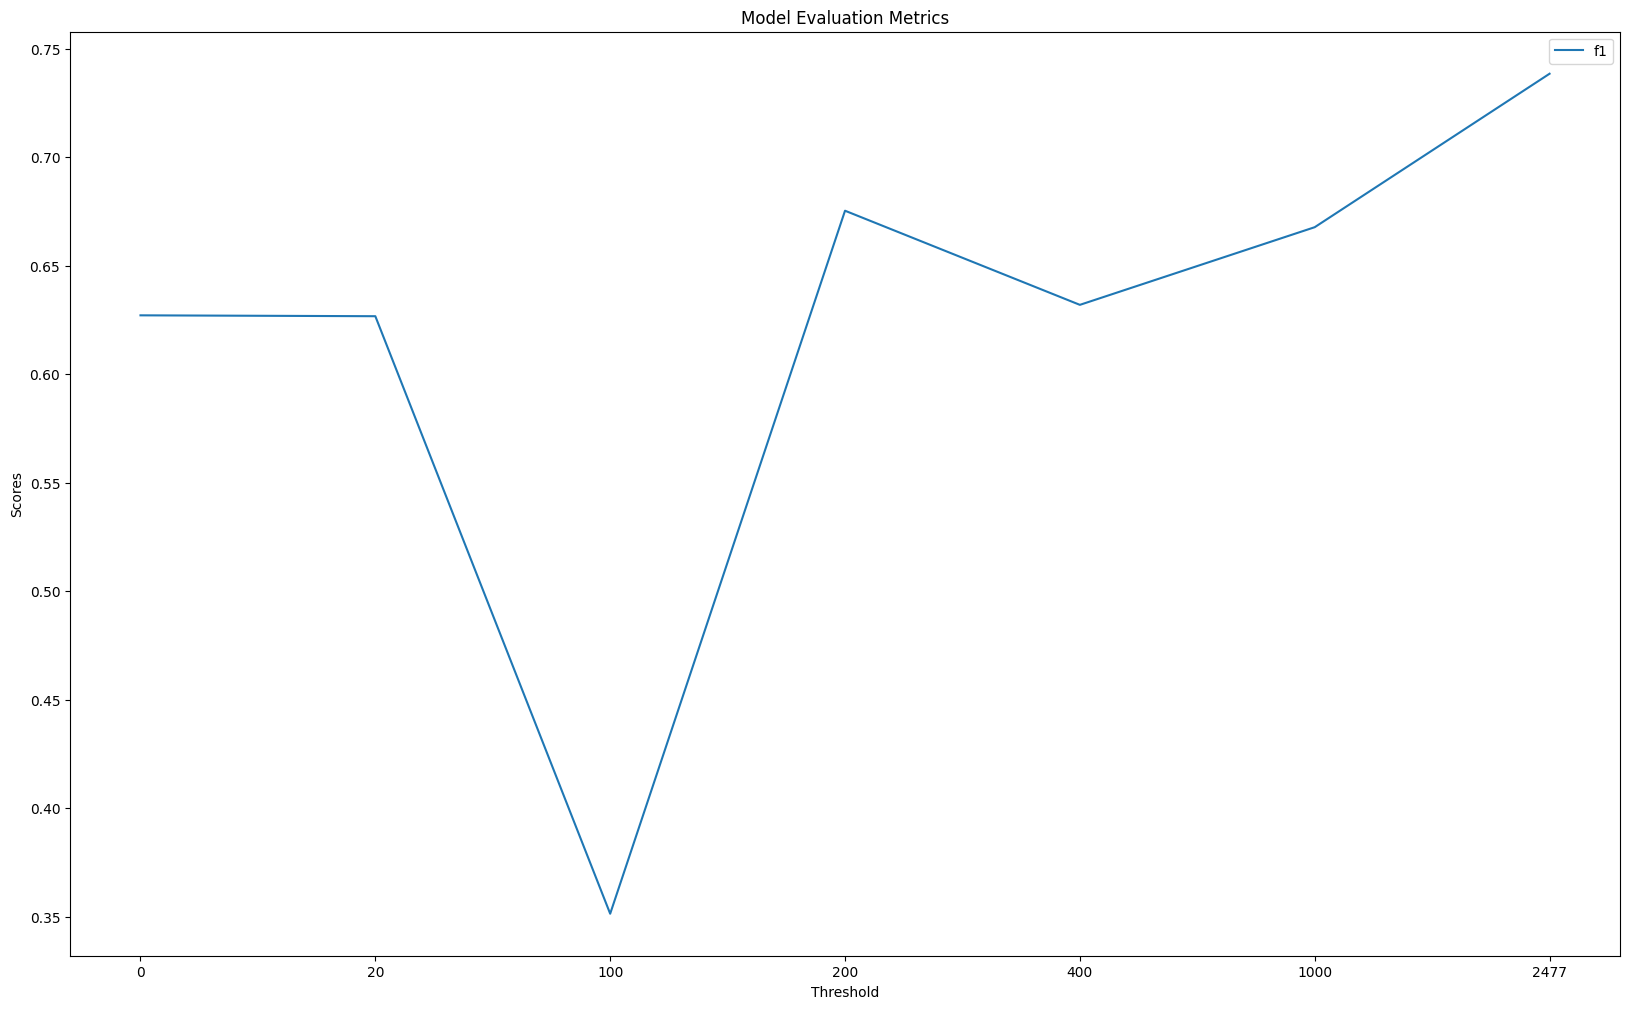

In [65]:
f.plot( figsize=(20, 12)).set(xlabel='Threshold', ylabel='Scores', title='Model Evaluation Metrics')